In [1]:
import pandas as pd


In [8]:
auto_data = pd.read_csv('datasets/02/demos/data/auto-mpg.data', delim_whitespace= True, header=None,
                        names= ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

C:\Users\JAmaral5\AppData\Local\Temp\ipykernel_17452\165595016.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_data = pd.read_csv('datasets/02/demos/data/auto-mpg.data', delim_whitespace= True, header=None,


In [9]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [10]:
len(auto_data['car_name'].unique())

305

In [11]:
auto_data = auto_data.drop('car_name',axis=1)
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [12]:
auto_data['origin'] = auto_data['origin'].replace({1: 'USA', 2: 'Europe', 3: 'Asia'})
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [13]:
auto_data = pd.get_dummies(auto_data, columns=['origin'])
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin_Asia,origin_Europe,origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [14]:
import numpy as np
auto_data = auto_data.replace('?', np.nan)
auto_data = auto_data.dropna()
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin_Asia,origin_Europe,origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.00,2130.0,24.6,82,False,True,False
395,32.0,4,135.0,84.00,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.00,2625.0,18.6,82,False,False,True


In [15]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('mpg', axis=1)

Y = auto_data['mpg']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [28]:
from sklearn.svm import SVR

regression_model = SVR(kernel= 'linear', C=.5)
regression_model.fit(X_train, Y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,0.5
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [29]:
regression_model.coef_

array([[-0.91314346,  0.02268979,  0.01915072, -0.00724669,  0.21985595,
         0.91803899,  0.40460805,  1.20735645, -1.6119645 ]])

In [30]:
regression_model.score(X_train,Y_train)

0.8087716316091305

<Axes: title={'center': 'Modal Coefficients'}>

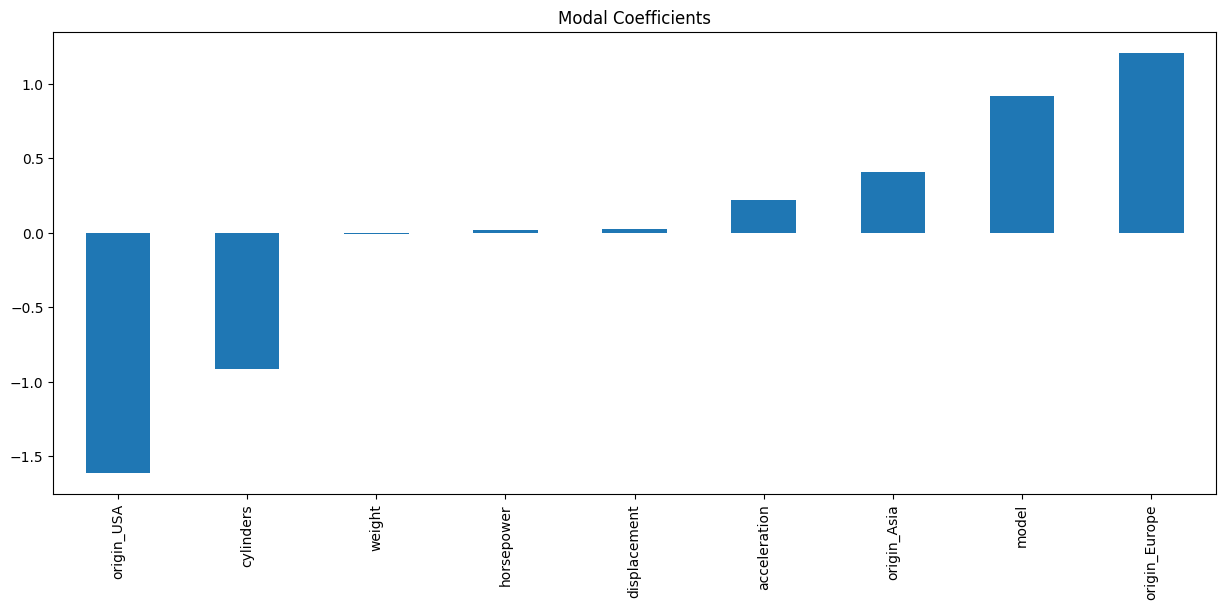

In [31]:
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline

predictors = X_train.columns
coef = Series(regression_model.coef_[0], index=predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [32]:
y_predict = regression_model.predict(X_test)

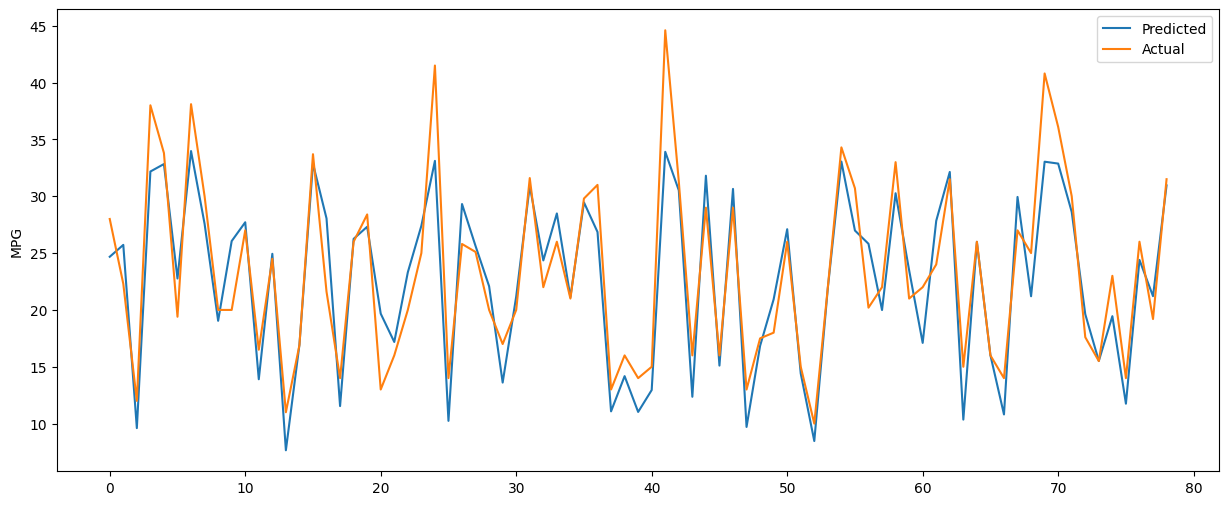

In [33]:
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (15,6)

plt.plot(y_predict, label='Predicted')
plt.plot(Y_test.values, label='Actual')
plt.ylabel('MPG')

plt.legend()
plt.show()

In [34]:
regression_model.score(X_test, Y_test)

0.8262845397302738

In [35]:
from sklearn.metrics import mean_squared_error

regression_model_mse = mean_squared_error(y_predict, Y_test)
regression_model_mse

10.797339127966195

In [36]:
import math 

math.sqrt(regression_model_mse)

3.285930481304526